In [5]:
from functions import *
result_dir = "../../exp_results_proposed_baseline_303000_random"
baseline_num_TP, _, baseline_results_df = check_correctness_simulator(result_dir + "/result_summary.csv")
baseline_results_df = baseline_results_df[['numTasks', 'utilization', 'TP']]
baseline_results_df = baseline_results_df.rename(columns={'TP': 'baseline'})
result_dir = "../../exp_results_proposed_heuristic_303000_random"
heuristic_num_TP, _, heuristic_results_df = check_correctness_simulator(result_dir + "/result_summary.csv")
heuristic_results_df = heuristic_results_df[['numTasks', 'utilization', 'TP']]
heuristic_results_df = heuristic_results_df.rename(columns={'TP': 'heuristic'})
result_dir = "../../exp_results_proposed_GA_303000_random"
GA_num_TP, _, GA_results_df = check_correctness_simulator(result_dir + "/result_summary.csv")
GA_results_df = GA_results_df[['numTasks', 'utilization', 'TP']]
GA_results_df = GA_results_df.rename(columns={'TP': 'GA'})

import pandas as pd
merged = pd.merge(baseline_results_df, heuristic_results_df, on=['numTasks', 'utilization'])
merged = pd.merge(merged, GA_results_df, on=['numTasks', 'utilization'])

# save to csv
# merged = merged[merged['numTasks'].isin([2.0, 4.0, 6.0, 8.0, 10.0])]
merged = merged[merged['numTasks'].isin([4.0, 8.0, 12.0, 16.0, 20.0])]
# merged.to_csv('nice_value_assignment.csv', index=False)
print(merged)

total_num_tasksets = 2000
print("total_TP_baseline: ", sum(merged['baseline']), "(", sum(merged['baseline'])/total_num_tasksets, ")")
print("total_TP_heuristic: ", sum(merged['heuristic']), "(", sum(merged['heuristic'])/total_num_tasksets, ")")
print("total_TP_GA: ", sum(merged['GA']), "(", sum(merged['GA'])/total_num_tasksets, ")")

    numTasks  utilization  baseline  heuristic   GA
4        4.0          0.2        90        100  100
5        4.0          0.4        60        100  100
6        4.0          0.6        34         97  100
7        4.0          0.8        16         86   95
12       8.0          0.2        36        100  100
13       8.0          0.4         5         89  100
14       8.0          0.6         2         69   91
15       8.0          0.8         0         35   70
20      12.0          0.2         5         86   98
21      12.0          0.4         0         29   67
22      12.0          0.6         0         11   33
23      12.0          0.8         0          3    9
24      16.0          0.2         2         40   62
25      16.0          0.4         0          1   12
26      16.0          0.6         0          2    6
27      16.0          0.8         0          1    1
28      20.0          0.2         0         16   24
29      20.0          0.4         0          0    1
30      20.0

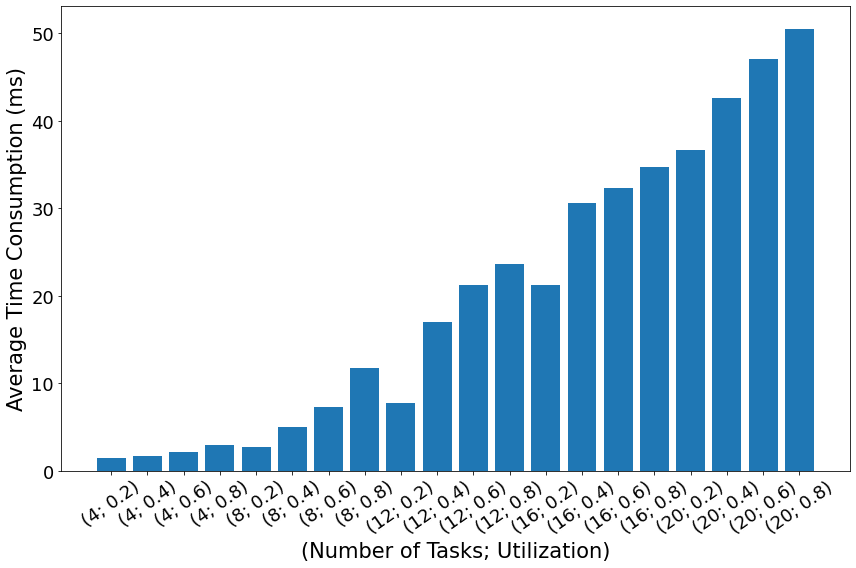

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

SAVE_FILE = False

heuristic_summary_result_path = "../../exp_results_proposed_time_consumption_heuristic_303000/result_summary.csv"
heuristic_df = pd.read_csv(heuristic_summary_result_path, sep=",")
heuristic_df = heuristic_df[['numTasks', 'utilization', 'proposed_timeConsumption(us)']]
heuristic_df = heuristic_df.rename(columns={'proposed_timeConsumption(us)': 'Heuristic'})
heuristic_df['Heuristic'] = heuristic_df['Heuristic'] / 1000
heuristic_df = heuristic_df.groupby(['numTasks', 'utilization']).mean()

fontsize = 18
xtick_rotation = 35

x = range(len(heuristic_df))
y = heuristic_df['Heuristic']

plt.figure(figsize=(12, 8))
plt.bar(x, y)
# x_labels = [f"nT: {numTasks}, U: {utilization}" for numTasks, utilization in merged_time_data.index]
x_labels = [f"({numTasks}; {utilization})" for numTasks, utilization in heuristic_df.index]
plt.xticks(x, x_labels, rotation=xtick_rotation, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('(Number of Tasks; Utilization)', fontsize=fontsize+3)
plt.ylabel('Average Time Consumption (ms)' ,fontsize=fontsize+3)
plt.tight_layout()

if SAVE_FILE:
    #save to pdf
    filename = 'Heuristic_time_consumption.pdf'
    if os.path.exists(filename):
        os.remove(filename)
    plt.savefig(filename)
    plt.close()
else:
    plt.show()

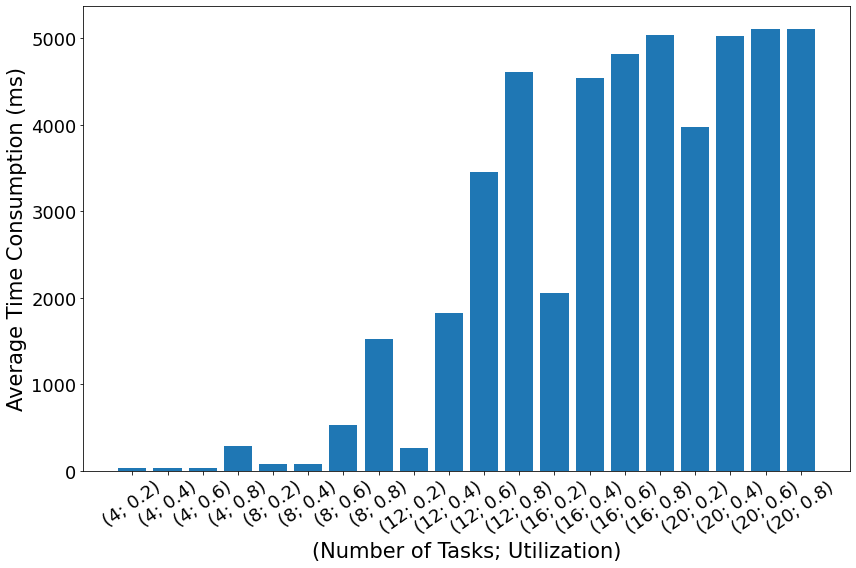

In [7]:
GA_summary_result_path = "../../exp_results_proposed_time_consumption_GA_303000/result_summary.csv"
GA_df = pd.read_csv(GA_summary_result_path, sep=",")
# GA_df = GA_df[GA_df['proposed_schedulability'] == True]
GA_df = GA_df[['numTasks', 'utilization', 'proposed_timeConsumption(us)']]
GA_df = GA_df.rename(columns={'proposed_timeConsumption(us)': 'Genetic Algorithm'})
GA_df['Genetic Algorithm'] = GA_df['Genetic Algorithm'] / 1000
GA_df = GA_df.groupby(['numTasks', 'utilization']).mean()

fontsize = 18
xtick_rotation = 35

x = range(len(GA_df))
y = GA_df['Genetic Algorithm']

plt.figure(figsize=(12, 8))
plt.bar(x, y)
# x_labels = [f"nT: {numTasks}, U: {utilization}" for numTasks, utilization in merged_time_data.index]
x_labels = [f"({numTasks}; {utilization})" for numTasks, utilization in GA_df.index]
plt.xticks(x, x_labels, rotation=xtick_rotation, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('(Number of Tasks; Utilization)', fontsize=fontsize+3)
plt.ylabel('Average Time Consumption (ms)' ,fontsize=fontsize+3)
plt.tight_layout()

if SAVE_FILE:
    #save to pdf
    filename = 'GA_time_consumption.pdf'
    if os.path.exists(filename):
        os.remove(filename)
    plt.savefig(filename)
    plt.close()
else:
    plt.show()

In [8]:
print("Heuristic time consumption: min: ", heuristic_df['Heuristic'].min(), ", max: ", heuristic_df['Heuristic'].max())
print("GA time consumption: min: ", GA_df['Genetic Algorithm'].min(), ", max: ", GA_df['Genetic Algorithm'].max())


Heuristic time consumption: min:  1.42816 , max:  50.554089999999995
GA time consumption: min:  37.08765 , max:  5112.20735
